In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from util.augmentation import TransformSelector
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

In [2]:
root = './data/train'
df = pd.read_csv('./data/train.csv')
df

,class_name,image_path,target
0,n01872401,n01872401/sketch_50.JPEG,59
1,n02417914,n02417914/sketch_11.JPEG,202
2,n02106166,n02106166/sketch_3.JPEG,138
3,n04235860,n04235860/sketch_2.JPEG,382
4,n02056570,n02056570/sketch_40.JPEG,80
...,...,...,...
15016,n02108089,n02108089/sketch_32.JPEG,143
15017,n02129604,n02129604/sketch_7.JPEG,172
15018,n07920052,n07920052/sketch_26.JPEG,484
15019,n02325366,n02325366/sketch_46.JPEG,186


In [3]:
img_path1=os.path.join(root, df.iloc[0,1])
img_path2=os.path.join(root, df.iloc[1,1])
img_path1

'./data/train/n01872401/sketch_50.JPEG'

In [4]:
img1=cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
img2=cv2.imread(img_path2, cv2.IMREAD_GRAYSCALE)
img1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

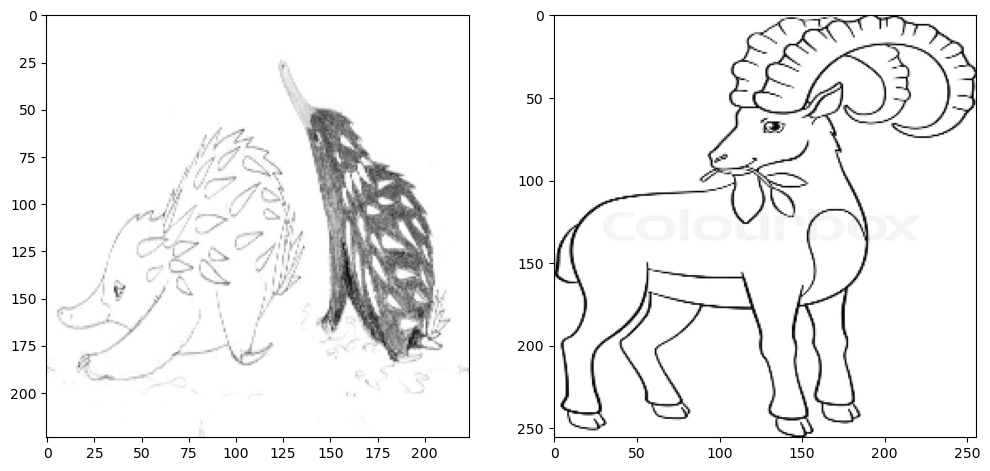

In [5]:
img1=A.Compose([A.Resize(224,224), ToTensorV2()])(image=img1)['image']
img2=A.Compose([A.Resize(256,256), ToTensorV2()])(image=img2)['image']
fig, ax=plt.subplots(1,2,figsize=[12,12])
ax[0].imshow(img1.transpose(0,1).transpose(1,2), cmap='grey')
ax[1].imshow(img2.transpose(0,1).transpose(1,2), cmap='grey')
plt.show()

In [6]:
# fig, ax=plt.subplots(1,2,figsize=[12,12])
# ax[0].imshow(img1, cmap='grey')
# ax[1].imshow(img2, cmap='grey')
# plt.show()

tensor([1.0288])


/Volumes/horive/ai/project/cv16/level1-imageclassification-cv-16-1/util/augmentation.py:119: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cut_w = torch.tensor(W * cut_rat, dtype=torch.int)
/Volumes/horive/ai/project/cv16/level1-imageclassification-cv-16-1/util/augmentation.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cut_h = torch.tensor(H * cut_rat, dtype=torch.int)


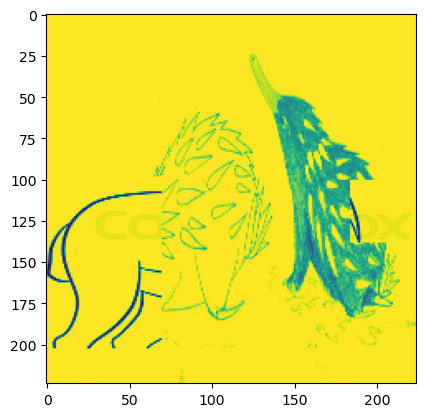

In [7]:

cutmix_selector=TransformSelector(transform_type='cutmix')
cutmix_transform = cutmix_selector.get_transform(alpha=0.5)
print(cutmix_transform(img1,img2,torch.tensor([1]),torch.tensor([2]))[1]) ### [1,224,224]가 뜬다
plt.imshow(cutmix_transform(img1,img2,torch.tensor([1]),torch.tensor([2]))[0].transpose(0,1).transpose(1,2))